### Парсинг данных и создание датафрейма

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [32]:
runN = "*" # If take all runs set runN = "*"
paths = glob.glob(f"build/Run{runN}_nt_ParticleData_t*.csv") #accel_data_secondary

In [33]:
with open(paths[0], 'r') as f:
    print(f"Headers from file: {paths[0]}")

    hlines = []
    while True:
        line = f.readline()
        if len(line) == 0 or line[0] != '#':
            break
        hlines.append(line)
    title = hlines[1].replace('#title ', '')[:-1]
    sep = chr(int(hlines[2].replace('#separator ', '')[:-1]))
    vsc_sep = chr(int(hlines[3].replace('#vector_separator ', '')[:-1]))
    columns = [' '.join(l.split(' ')[2:])[:-1] for l in hlines[4:]]
    meta_len = len(hlines)
    # print(f'Metarows: {meta_len}\nColumns: {columns}')

Headers from file: build/Run0_nt_ParticleData_t8.csv


In [34]:
data = pd.DataFrame()
for path in paths[:10]:
    item = pd.read_csv(path, skiprows=meta_len, names=columns)
    data = pd.concat([data, item], ignore_index=True)

In [35]:
len(data)

6240668

In [36]:
data

,particle_name,creator_process,parentID,energy,z,dE
0,e-,compt,1,0.019490,1.36201,0.000871
1,e-,compt,1,0.000000,1.36197,0.019490
2,e-,compt,1,0.100797,4.17628,0.005162
3,e-,compt,1,0.073536,4.17662,0.027262
4,e-,compt,1,0.060872,4.17709,0.012663
...,...,...,...,...,...,...
6240663,e-,compt,1,0.058656,-8.22958,0.015636
6240664,e-,compt,1,0.049009,-8.23210,0.009647
6240665,e-,compt,1,0.035212,-8.23303,0.013797
6240666,e-,compt,1,0.018566,-8.23300,0.016645


In [55]:
l = len(data)
res = []
for name in set(data['particle_name']):
    count = len(data[data['particle_name'] == name])
    res.append((name, count, count/l*100))
    
pd.DataFrame(res, columns=['name', 'count', 'percent'])

,name,count,percent
0,e+,78045,1.250587
1,N15,3,0.000048
2,e-,5965429,95.589591
3,O16,2949,0.047255
4,alpha,29,0.000465
5,neutron,25,0.000401
6,deuteron,1,0.000016
7,gamma,194091,3.110100
8,C12,17,0.000272
9,O18,6,0.000096


/tmp/ipykernel_12458/2208960678.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bin_data = nfilt[nfilt['z']>b][nfilt['z']<borders[i+1]]


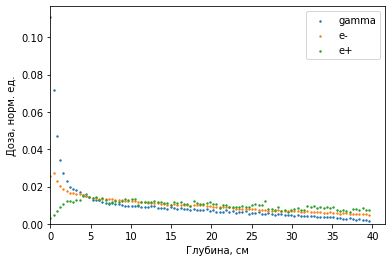

In [62]:
for name in ['gamma', 'e-', 'e+']:
    nfilt = data[data['particle_name'] == name]
    bins = []
    borders = np.linspace(-20, 20, 100)
    for i, b in enumerate(borders[:-1]):
        bin_data = nfilt[nfilt['z']>b][nfilt['z']<borders[i+1]]
        bins.append(sum(bin_data['dE']))
    plt.scatter(np.array(borders[:-1])+20, np.array(bins)/sum(np.array(bins)), s=2, label=name)
    plt.xlim([0, plt.xlim()[1]])
    plt.ylim([0, plt.ylim()[1]])
    # plt.yscale('log')
    plt.legend()
    plt.ylabel('Доза, норм. ед.')
    plt.xlabel('Глубина, см')
plt.show()

In [6]:
set(data['creator_process'])

{'annihil',
 'compt',
 'conv',
 'eBrem',
 'eIoni',
 'hadElastic',
 'phot',
 'photonNuclear'}

In [14]:
pnames = {'annihil':'Аннигиляция',
 'compt':'Комптон-эффект',
 'conv':'Обратная аннигиляция',
 'eBrem':'Тормозное излучение',
 'eIoni':'Ионизационные потери',
 'hadElastic':'?',
 'phot':'Фотоэффект',
 'photonNuclear':'?'}

e - elecron, Brem - тормозное излучение, Ionic - ионизационные потери (неупругое)

conv - обратная аннигилияция (фотоны в электроны и позитроны)

annihil - аннигилиция

phot - фотоэффект

In [7]:
data.head()

,particle_name,creator_process,parentID,energy
0,e-,compt,1,0.014900
1,e-,compt,1,0.000000
2,e-,compt,1,0.000249
3,e-,compt,1,0.000000
4,gamma,eBrem,1,0.047696


In [22]:
filt = data[data['parentID'] != 0] # Вторичные частицы

filt = filt[filt['creator_process'] != 'user']
# filt = filt[filt['particle_name'] == 'gamma'] # Вторичные электроны

In [7]:
len(filt)

61200423

In [24]:
# for process in ['eIoni', 'compt', 'conv', 'phot']:
#     proc_data = filt[filt['creator_process'] == process]
#     # n, e, _ = plt.hist(proc_data['energy'], bins=100)
#     n, e = np.histogram(proc_data['energy'], bins=100)
#     plt.plot(e[:-1], n/(0.5*10**7), label=pnames[process]) # 
# plt.legend()
# plt.yscale('log')
# plt.ylabel('Количество частиц')
# plt.xlabel('Энергия, МэВ')
# plt.show()

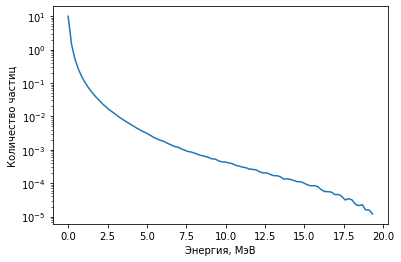

In [23]:
n, e = np.histogram(filt['energy'], bins=100)
n, e = n[:-10], e[:-11]
plt.plot(e, n/(0.5*10**7))
#plt.xlim([0, 20])
#plt.legend()
plt.yscale('log')
plt.ylabel('Количество частиц')
plt.xlabel('Энергия, МэВ')
plt.show()